# <font color = "brown"> ARMA </font>

## <font color = 'brown'> Importing Libraries </font>

In [1]:
import pandas as pd
import numpy as ## <font color = 'brown'> Importing Libraries </font>np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

## <font color = 'brown'> Read Data </font>

In [2]:
train = pd.read_excel("../../preprocessed_data/training_data.xlsx")# pd.read_csv("../../preprocessed_data/mandatory_train.csv")
train['Time (UTC+10)'] = pd.to_datetime(train['Time (UTC+10)'])
train = train.iloc[:,1:]
train.columns = ['time', 'NSW price', 'SA price', 'TAS price', 'VIC price', 'NSW supply', 'SA supply', 
                  'TAS supply', 'VIC supply', 'NSW demand', 'SA demand', 'TAS demand', 'VIC demand']
train.tail()

,time,NSW price,SA price,TAS price,VIC price,NSW supply,SA supply,TAS supply,VIC supply,NSW demand,SA demand,TAS demand,VIC demand
61291,2021-06-30 21:30:00,70.61,93.83,63.35,65.79,28.47,57.81,110.08,205.28,9477,1968,1382,6082
61292,2021-06-30 22:00:00,95.21,112.19,117.54,92.52,29.46,31.90,109.11,216.45,9214,1850,1332,5874
61293,2021-06-30 22:30:00,71.81,95.28,63.15,67.46,27.71,20.82,103.20,224.00,9022,1766,1289,5653
61294,2021-06-30 23:00:00,75.17,87.72,60.16,60.16,12.08,11.21,79.69,211.81,8804,1672,1269,5397
61295,2021-06-30 23:30:00,80.41,88.37,71.57,73.85,3.41,6.33,81.11,190.95,8654,1587,1231,5487


In [3]:
test = pd.read_excel("../../preprocessed_data/testing_data.xlsx")#pd.read_csv("../../preprocessed_data/mandatory_test.csv")
test['Time (UTC+10)'] = pd.to_datetime(test['Time (UTC+10)'])
test = test.iloc[:,1:]
test.columns = ['time', 'NSW price', 'SA price', 'TAS price', 'VIC price', 'NSW supply', 'SA supply', 
                  'TAS supply', 'VIC supply', 'NSW demand', 'SA demand', 'TAS demand', 'VIC demand']
test.tail()

,time,NSW price,SA price,TAS price,VIC price,NSW supply,SA supply,TAS supply,VIC supply,NSW demand,SA demand,TAS demand,VIC demand
2156,2021-08-14 22:00:00,50.84,59.16,7.54,49.93,8.74,36.42,154.69,182.52,8491,1718,1255,5492
2157,2021-08-14 22:30:00,66.85,80.01,10.52,62.86,7.52,51.83,156.09,206.23,8376,1665,1244,5344
2158,2021-08-14 23:00:00,55.64,77.76,7.63,32.26,7.69,42.04,160.30,215.20,8194,1614,1207,5204
2159,2021-08-14 23:30:00,52.25,76.47,7.52,25.10,8.35,38.04,167.00,226.95,8022,1573,1163,5268
2160,2021-08-15 00:00:00,48.69,83.68,23.87,8.73,8.07,47.47,156.92,251.75,7867,1680,1139,5244


### look at train dataframe

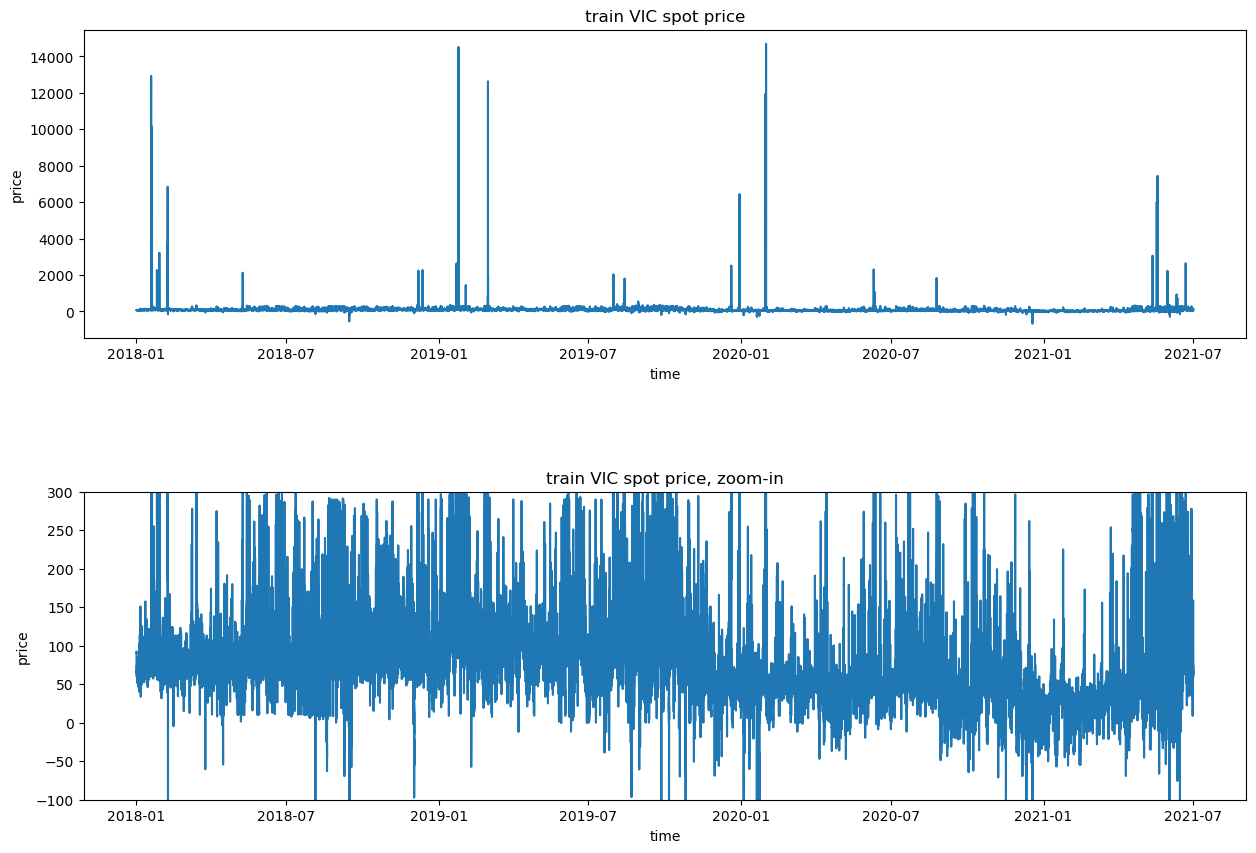

In [4]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(train[['time']], train[['VIC price']])
plt.gca().set(title='train VIC spot price', xlabel='time', ylabel='price')

plt.subplot(212)
plt.plot(train[['time']], train[['VIC price']])
plt.gca().set(title='train VIC spot price, zoom-in', xlabel='time', ylabel='price')
plt.ylim(-100,300)

plt.subplots_adjust(hspace=0.5)
plt.show()

### test stationary to choose d

In [5]:
# the VIC price in train data is stationary
result = adfuller(train['VIC price'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -25.002355040147304
p-value: 0.0
Critial Values:
   1%, -3.4304567929672247
Critial Values:
   5%, -2.861587200489141
Critial Values:
   10%, -2.5667951232260715


### ACF plot and PACF plot

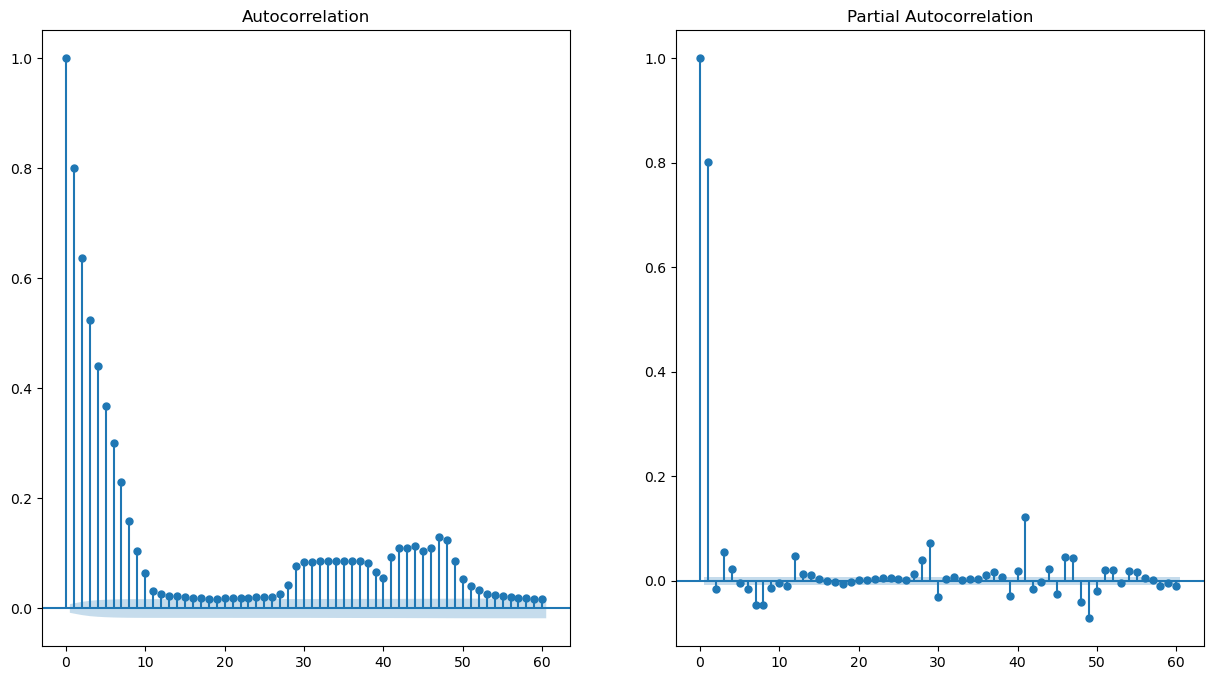

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
plot_acf(train['VIC price'], lags=60, ax=axes[0])
axes[0].set_title('Autocorrelation')
plot_pacf(train['VIC price'], lags=60, ax=axes[1])
axes[1].set_title('Partial Autocorrelation')
plt.show()

### ARMA model

#### choose order=(1,0,10)

In [7]:
model = ARIMA(train['VIC price'], order=(1, 0, 10))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              VIC price   No. Observations:                61296
Model:                ARIMA(1, 0, 10)   Log Likelihood             -403513.896
Date:                Wed, 13 Oct 2021   AIC                         807053.793
Time:                        14:13:27   BIC                         807171.098
Sample:                             0   HQIC                        807090.194
                              - 61296                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.7518      7.340     10.729      0.000      64.365      93.138
ar.L1          0.2637      0.007     38.695      0.000       0.250       0.277
ma.L1          0.5455      0.007     80.453      0.0

In [10]:
history = list(train['VIC price'].values[-10:])
ltest = list(test['VIC price'].values)
testprediction = list()

for t in range(0,len(ltest)):
    model = ARIMA(history[-10:], order=(1,0,10))
    prediction = model.fit().forecast()[0]
    testprediction.append(prediction)
    history.append(ltest[t])

In [11]:
testprediction_df = pd.DataFrame(testprediction, index=test.index, columns=['Predicted Price'])
testprediction_df.insert(0, 'Time (UTC+10)', test['time'])
testprediction_df

,Time (UTC+10),Predicted Price
0,2021-07-01 00:00:00,86.648190
1,2021-07-01 00:30:00,79.544752
2,2021-07-01 01:00:00,87.232014
3,2021-07-01 01:30:00,67.978892
4,2021-07-01 02:00:00,83.347320
...,...,...
2156,2021-08-14 22:00:00,120.369142
2157,2021-08-14 22:30:00,108.510558
2158,2021-08-14 23:00:00,85.123126
2159,2021-08-14 23:30:00,45.348283


In [12]:
testprediction_df.to_excel("../../prediction_data/ARIMA_predictions.xlsx", index=False)

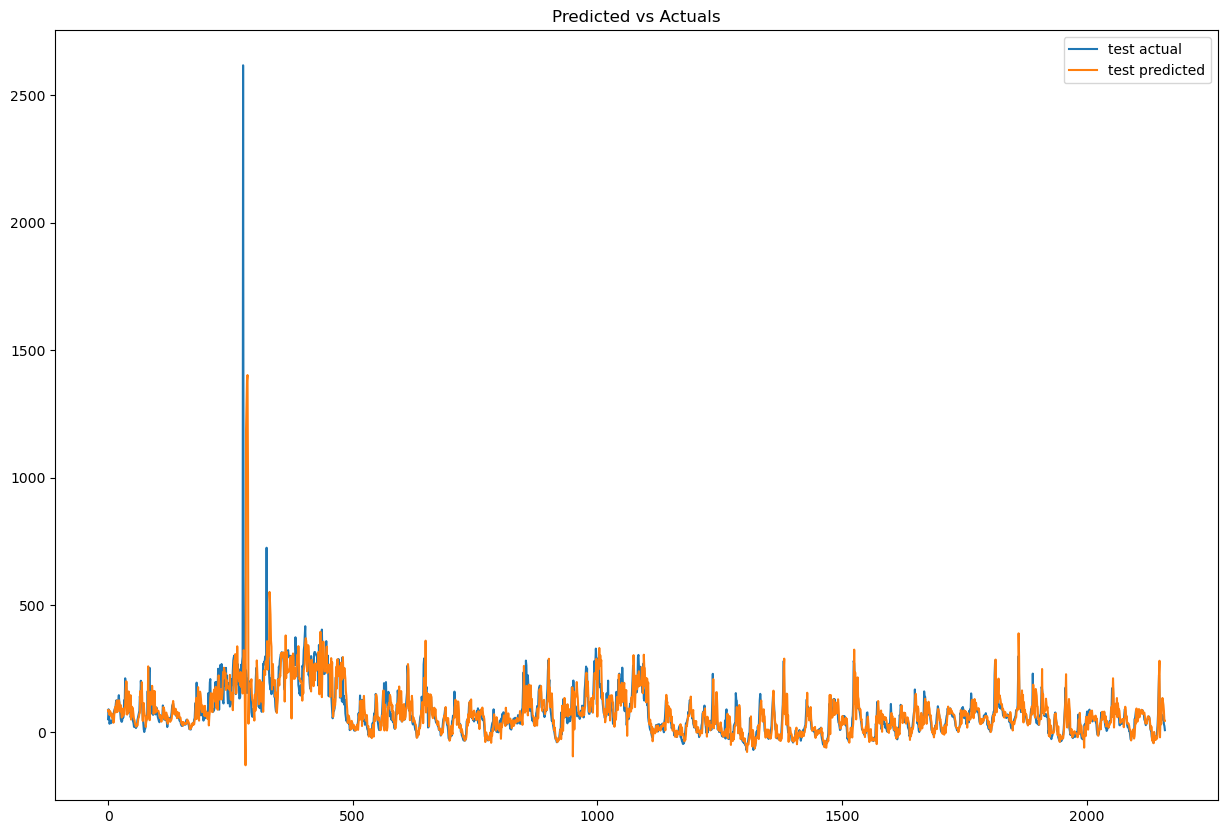

In [13]:
plt.figure(figsize=(15,10))
plt.plot(test['VIC price'], label='test actual')
plt.plot(testprediction_df['Predicted Price'], label='test predicted')
plt.title('Predicted vs Actuals')
plt.legend()
plt.savefig("../../plots/ARMA.png")
plt.show()

## <font color = 'brown'> Calculate Metrics </font>
To evaluate performance, the metrics used are:

1. Mean Absolute Percentage Error (MAPE)
$\\ \dfrac{100\%}{n}\sum\limits_{t=1}^{n}\left |\frac{e_t}{y_t}\right|$


2. Root-Mean-Square Error (RMSE)
$\\ \sqrt{\dfrac{1}{n}\sum\limits_{t=1}^{n}e_t^2}$ 


3. Mean Absolute Error (MAE)
$\\ \dfrac{1}{n}\sum\limits_{t=1}^{n}|e_t|$

where $e_t$ is $Y_{predicted} - Y_{actual}$

In [60]:
# Define metrics
# Cited from https://towardsdatascience.com/dynamic-time-warping-3933f25fcdd, https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
rmse = np.sqrt(mean_squared_error(test['VIC price'].values, testprediction_df['Predicted Price'].values))
mae = mean_absolute_error(test['VIC price'].values, testprediction_df['Predicted Price'].values)
mape = mean_absolute_percentage_error(test['VIC price'].values, testprediction_df['Predicted Price'].values)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('MAPE: ', mape)

RMSE:  88.25602364727443
MAE:  36.98425683269871
MAPE:  171.31831256736288
